In [61]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [50]:
import json

In [51]:
# load reviews.json
with open('reviews.json', 'r') as f:
    pages = json.load(f)

In [52]:
# filter pages such that each page must have page["searchPageProps"]["mainContentComponentsListProps"]
pages = [page for page in pages if "mainContentComponentsListProps" in page["searchPageProps"]]

In [53]:
results = []

for page in pages:
    for result in page["searchPageProps"]["mainContentComponentsListProps"][3:]:
        if "searchResultBusiness" not in result or result["searchResultBusiness"]["isAd"]:
            continue
        results.append(result["searchResultBusiness"])

print(results)

[{'ranking': 1, 'isAd': False, 'renderAdInfo': False, 'name': 'Buena Onda', 'alternateNames': [], 'businessUrl': '/biz/buena-onda-santa-barbara-4?osq=Restaurants', 'categories': [{'title': 'Argentine', 'url': '/search?find_desc=Argentine'}, {'title': 'Latin American', 'url': '/search?find_desc=Latin+American'}, {'title': 'Empanadas', 'url': '/search?find_desc=Empanadas'}, {'title': 'Casual', 'url': '/search?find_desc=Casual'}, {'title': 'Trendy', 'url': '/search?find_desc=Trendy'}], 'priceRange': '$$', 'rating': 4.7, 'reviewCount': 723, 'formattedAddress': '', 'neighborhoods': [], 'phone': '(805) 259-3593', 'serviceArea': None, 'parentBusiness': None, 'servicePricing': None, 'serviceOfferings': [], 'businessAttributes': {}, 'alias': 'buena-onda-santa-barbara-4', 'website': {'href': 'https://www.buenaondasb.com', 'rel': 'noopener nofollow'}, 'businessSectionUrls': {'portfolio': '/biz/buena-onda-santa-barbara-4?osq=Restaurants#portfolio'}}, {'ranking': 2, 'isAd': False, 'renderAdInfo': F

In [54]:
len(results)

239

In [55]:
results

[{'ranking': 1,
  'isAd': False,
  'renderAdInfo': False,
  'name': 'Buena Onda',
  'alternateNames': [],
  'businessUrl': '/biz/buena-onda-santa-barbara-4?osq=Restaurants',
  'categories': [{'title': 'Argentine', 'url': '/search?find_desc=Argentine'},
   {'title': 'Latin American', 'url': '/search?find_desc=Latin+American'},
   {'title': 'Empanadas', 'url': '/search?find_desc=Empanadas'},
   {'title': 'Casual', 'url': '/search?find_desc=Casual'},
   {'title': 'Trendy', 'url': '/search?find_desc=Trendy'}],
  'priceRange': '$$',
  'rating': 4.7,
  'reviewCount': 723,
  'formattedAddress': '',
  'neighborhoods': [],
  'phone': '(805) 259-3593',
  'serviceArea': None,
  'parentBusiness': None,
  'servicePricing': None,
  'serviceOfferings': [],
  'businessAttributes': {},
  'alias': 'buena-onda-santa-barbara-4',
  'website': {'href': 'https://www.buenaondasb.com',
   'rel': 'noopener nofollow'},
  'businessSectionUrls': {'portfolio': '/biz/buena-onda-santa-barbara-4?osq=Restaurants#portfo

In [56]:
results = [
    {
        "url": f"https://www.yelp.com{result['businessUrl']}",
        "name": result["name"],
        "rating": result["rating"],
        "review_count": result["reviewCount"],
        "price": result["priceRange"],
    }
    for result in results
]

In [58]:
# sort results by a tuple of (rating, review_count)
results = sorted(results, key=lambda x: (x['rating'], x['review_count']), reverse=True)
results

# now export results to a csv file
import pandas as pd
df = pd.DataFrame(results)
df.to_csv('results.csv', index=False)
df



,url,name,rating,review_count,price
0,https://www.yelp.com/biz/teddy-rice-isla-vista...,Teddy Rice,5.0,19,
1,https://www.yelp.com/biz/santa-playa-mariscos-...,Santa Playa Mariscos,5.0,12,
2,https://www.yelp.com/biz/creperia-el-chisme-sa...,Creperia El Chisme,5.0,5,
3,https://www.yelp.com/biz/taste-makers-market-s...,Taste Makers Market,5.0,1,
4,https://www.yelp.com/biz/cheverez-seafoods-san...,Cheverez Seafoods,5.0,1,
...,...,...,...,...,...
234,https://www.yelp.com/biz/jeannines-restaurant-...,Jeannine’s Restaurant & Bakery,3.5,6,
235,https://www.yelp.com/biz/terra-santa-barbara?o...,Terra,3.4,20,
236,https://www.yelp.com/biz/shalhoob-s-magnolia-s...,Shalhoob’s Magnolia,3.3,83,$$
237,https://www.yelp.com/biz/marbella-santa-barbar...,Marbella,3.3,22,$$


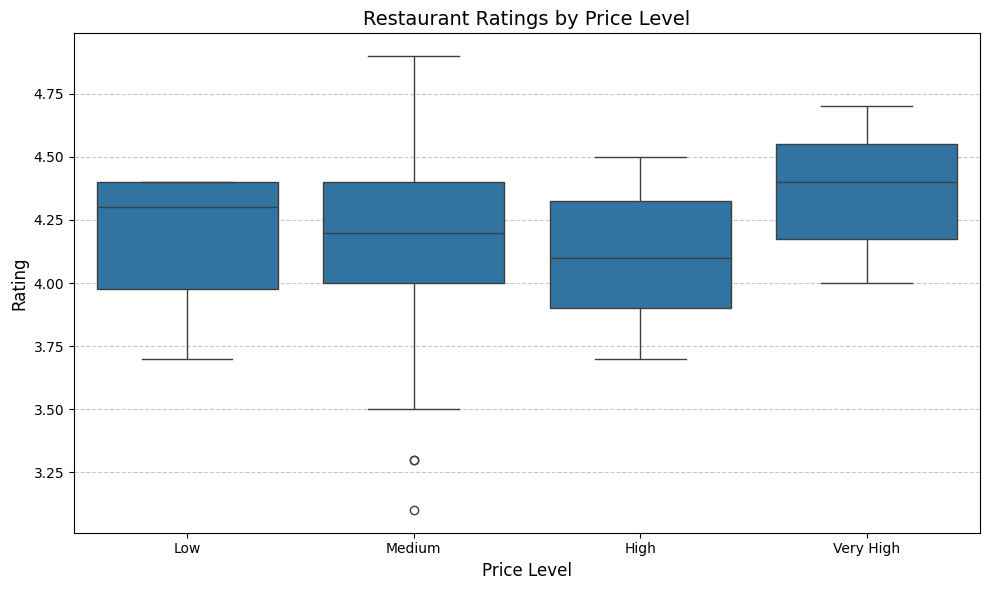

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out empty price strings
df_filtered = df[df['price'].str.len() > 0].copy()

# Create a mapping for price levels to avoid the $ symbol issue
price_mapping = {
    '$': 'Low',
    '$$': 'Medium',
    '$$$': 'High',
    '$$$$': 'Very High'
}

# Create a new column with mapped values
df_filtered['price_category'] = df_filtered['price'].map(price_mapping)

# Create the visualization
plt.figure(figsize=(10, 6))

# Create box plot using the mapped categories with ordered categories
sns.boxplot(data=df_filtered, 
            x='price_category', 
            y='rating',
            order=['Low', 'Medium', 'High', 'Very High'])

# Customize the plot
plt.title('Restaurant Ratings by Price Level', fontsize=14)
plt.xlabel('Price Level', fontsize=12)
plt.ylabel('Rating', fontsize=12)

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()